# 繪製Heatmap & Grid-plot

* 常⽤於呈現變數間的相關性
* 也可以⽤於呈現不同條件下，數量的⾼低關係
* pair/gridplot 結合了 scatter plot 與 historgram 的好處來呈現變數間的相關程度
---

# 練習題目
1. 用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# 練習重點
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
 (Hint : numpy.random.randn - 常態分布)

# 練習目標
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap
---

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**1. 用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap**

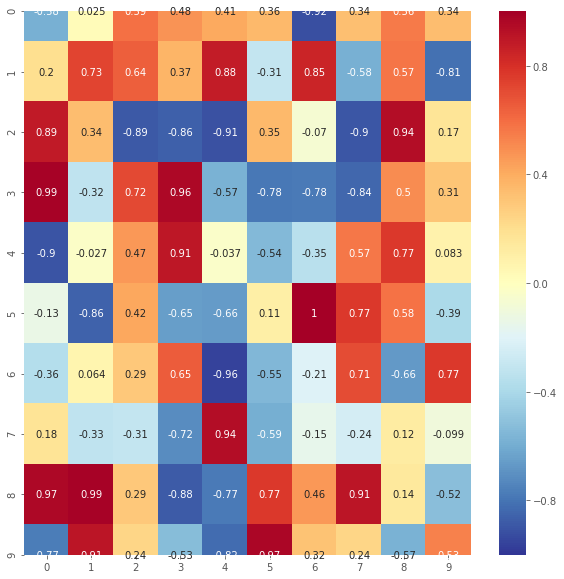

In [2]:
# 原本隨機 0.0 ~ 1.0, 減 0.5 乘兩倍 -> -1.0 ~ 1.0
matrix = (np.random.random((10,10)) - 0.5) * 2
plt.figure(figsize=(10,10))

# 使用 seaborn heatmap
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
plt.show()

**2. 用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)**

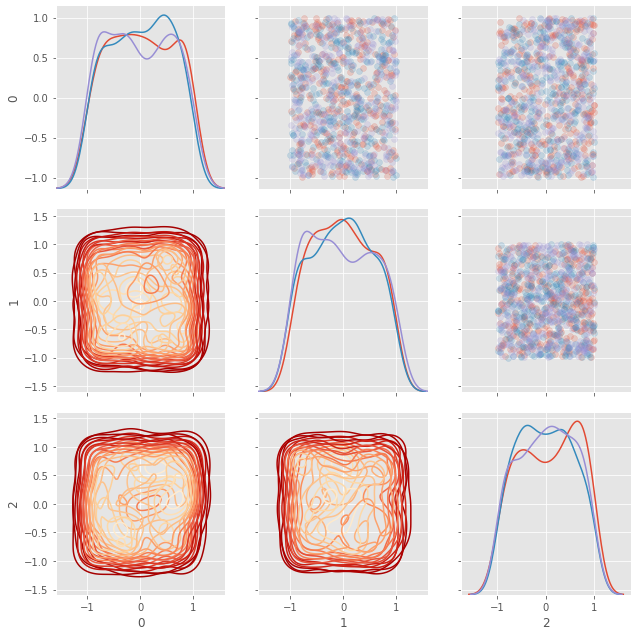

In [3]:
nrow = 1000
ncol = 3

# 原本隨機 0.0 ~ 1.0, 減 0.5 乘兩倍 -> -1.0 ~ 1.0
matrix = (np.random.random((1000,3)) - 0.5)*2

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# 右上散佈圖, 對角線KDE, 左下density plot
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

**3. 用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)**

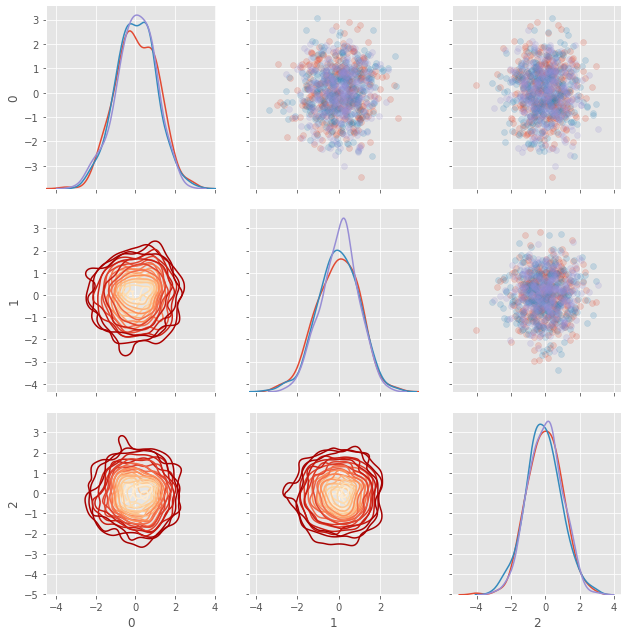

In [4]:
nrow = 1000
ncol = 3

# 常態分布隨機
matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

# 右上散佈圖, 對角線KDE, 左下density plot
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()